In [232]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime
import matplotlib.dates as mdates
import yfinance as yf
plt.style.use('fivethirtyeight')

In [233]:
security = 'meta'
his_period = 30  # 历史时间
# df = yf.download(security, end=datetime.date.today())
df = yf.download(security, end='2023-10-17')
# df = yf.download(security, start='2023-11-20', interval='1m')
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-03,304.260010,306.769989,299.640015,300.940002,300.940002,17362300
2023-10-04,298.730011,306.899994,298.500000,305.579987,305.579987,16880500
2023-10-05,304.630005,306.209991,299.500000,304.790009,304.790009,19130000
2023-10-06,301.440002,316.309998,300.910004,315.429993,315.429993,21784000
2023-10-09,312.500000,320.329987,311.820007,318.359985,318.359985,22503700
2023-10-10,319.119995,324.660004,318.160004,321.839996,321.839996,19038000
2023-10-11,323.010010,328.839996,322.950012,327.820007,327.820007,22036300
2023-10-12,328.000000,330.540009,322.690002,324.160004,324.160004,20530500
2023-10-13,323.529999,325.049988,312.369995,314.690002,314.690002,21341000


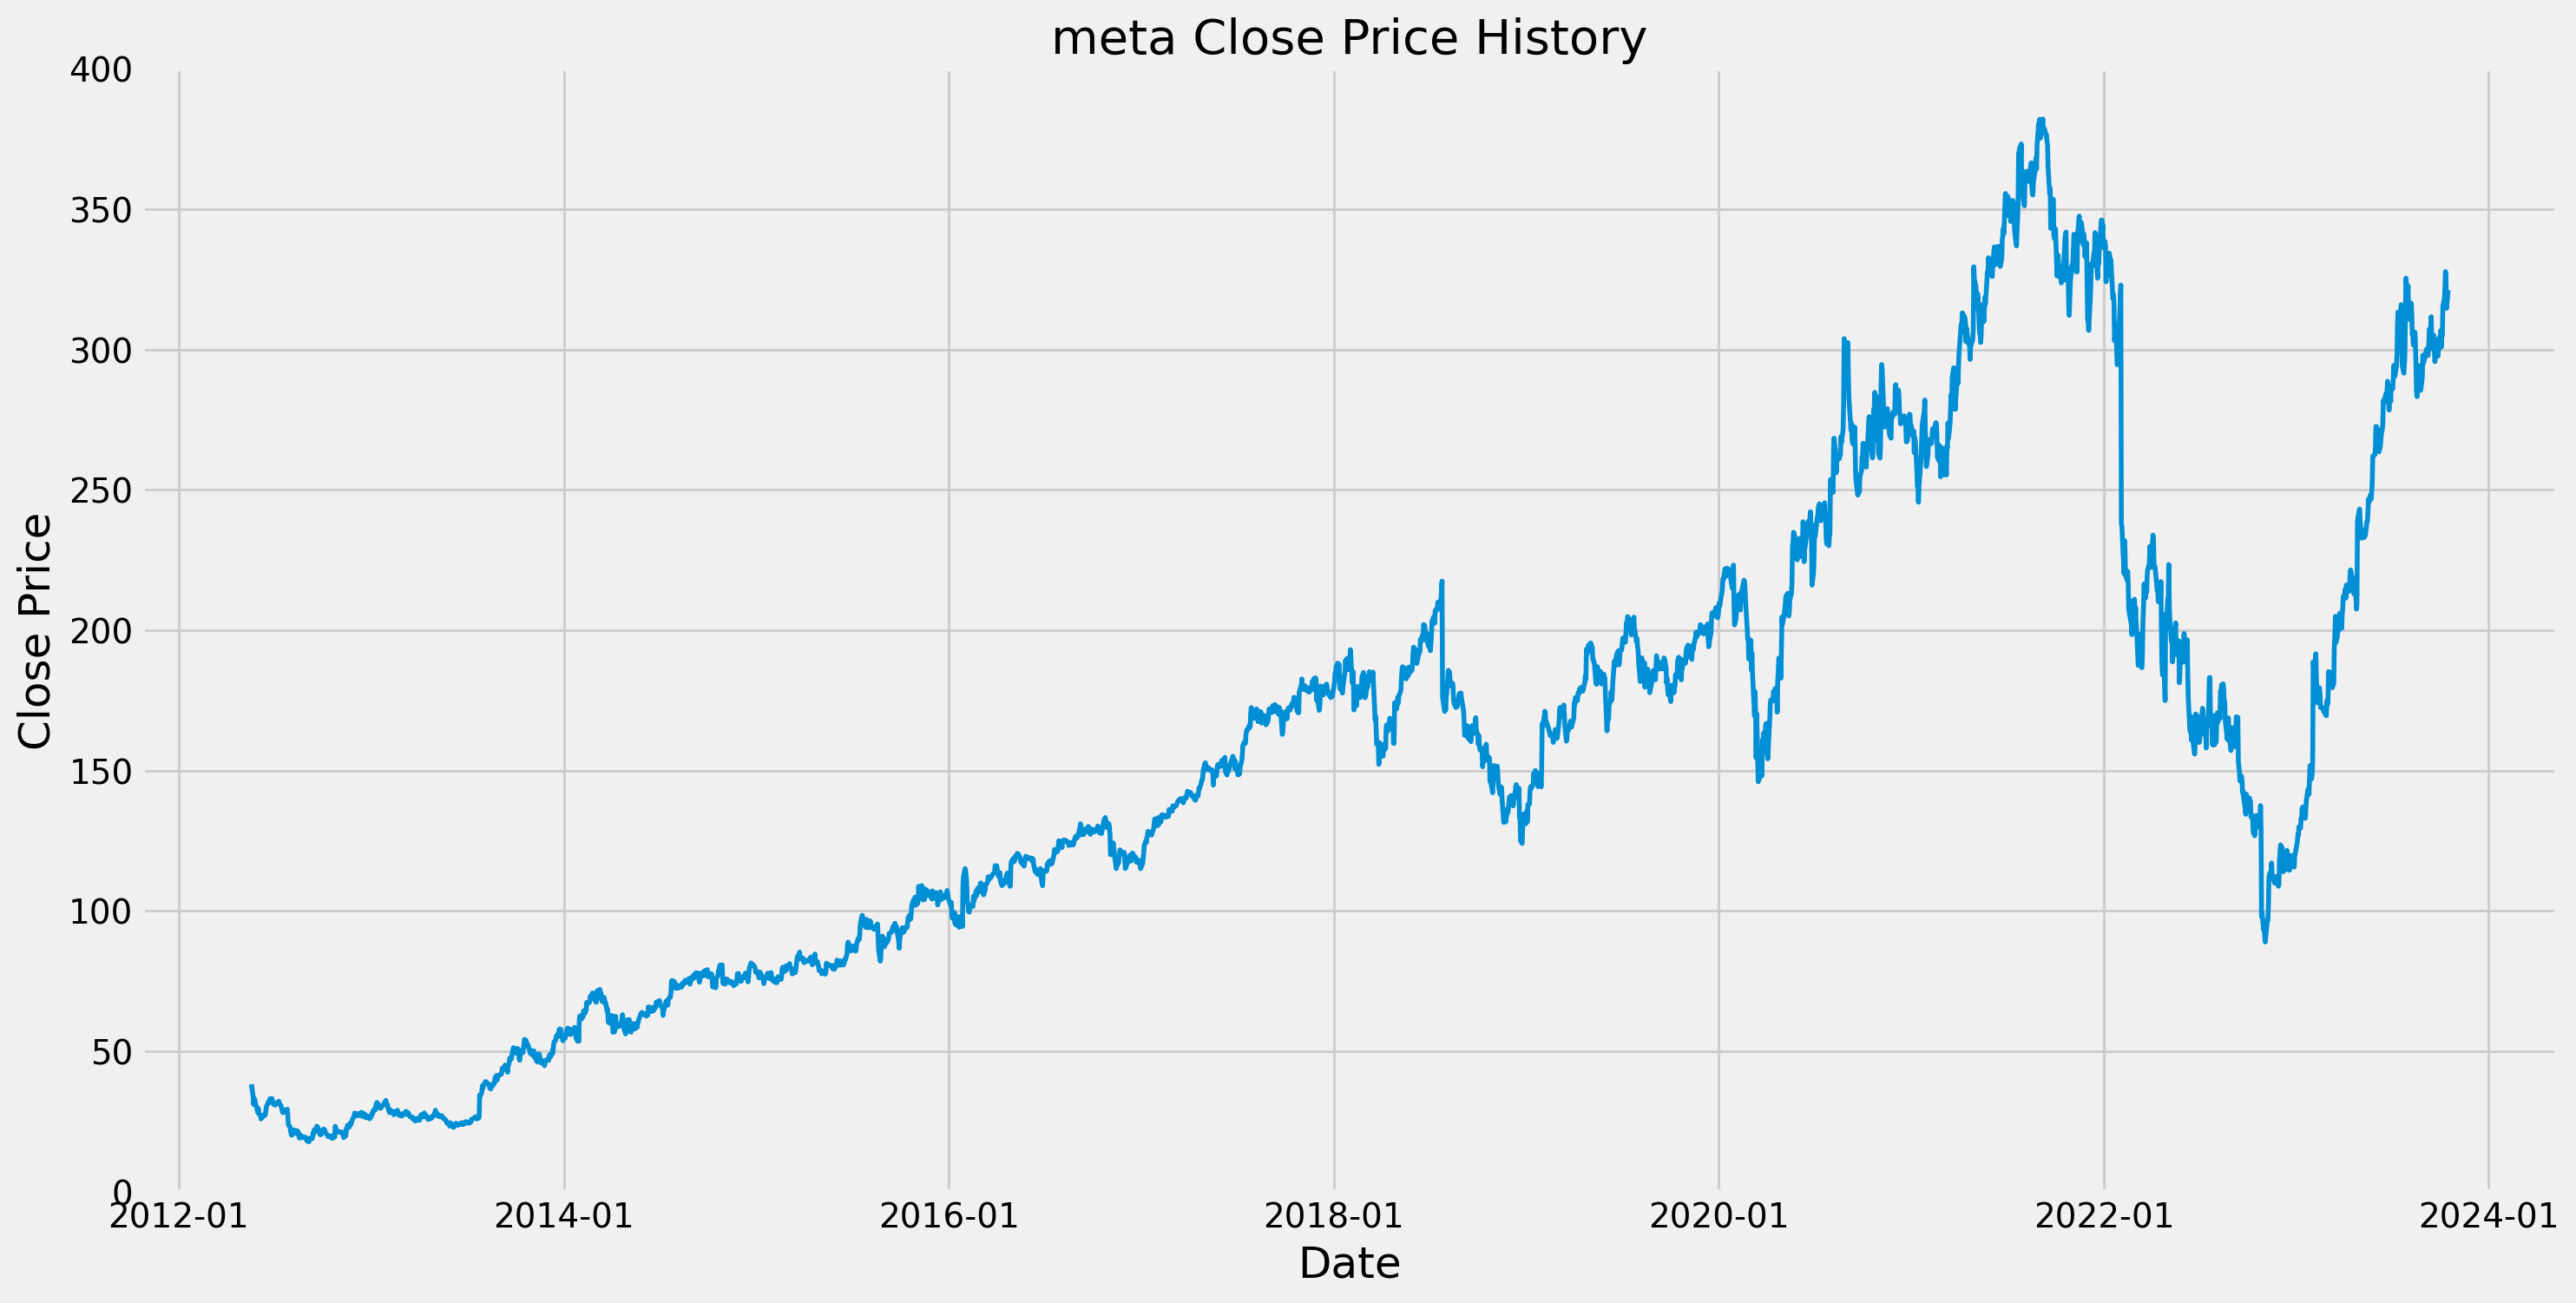

In [234]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('{} Close Price History'.format(security))
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig('{}_PriceHistory.png'.format(security))
plt.show()

In [235]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

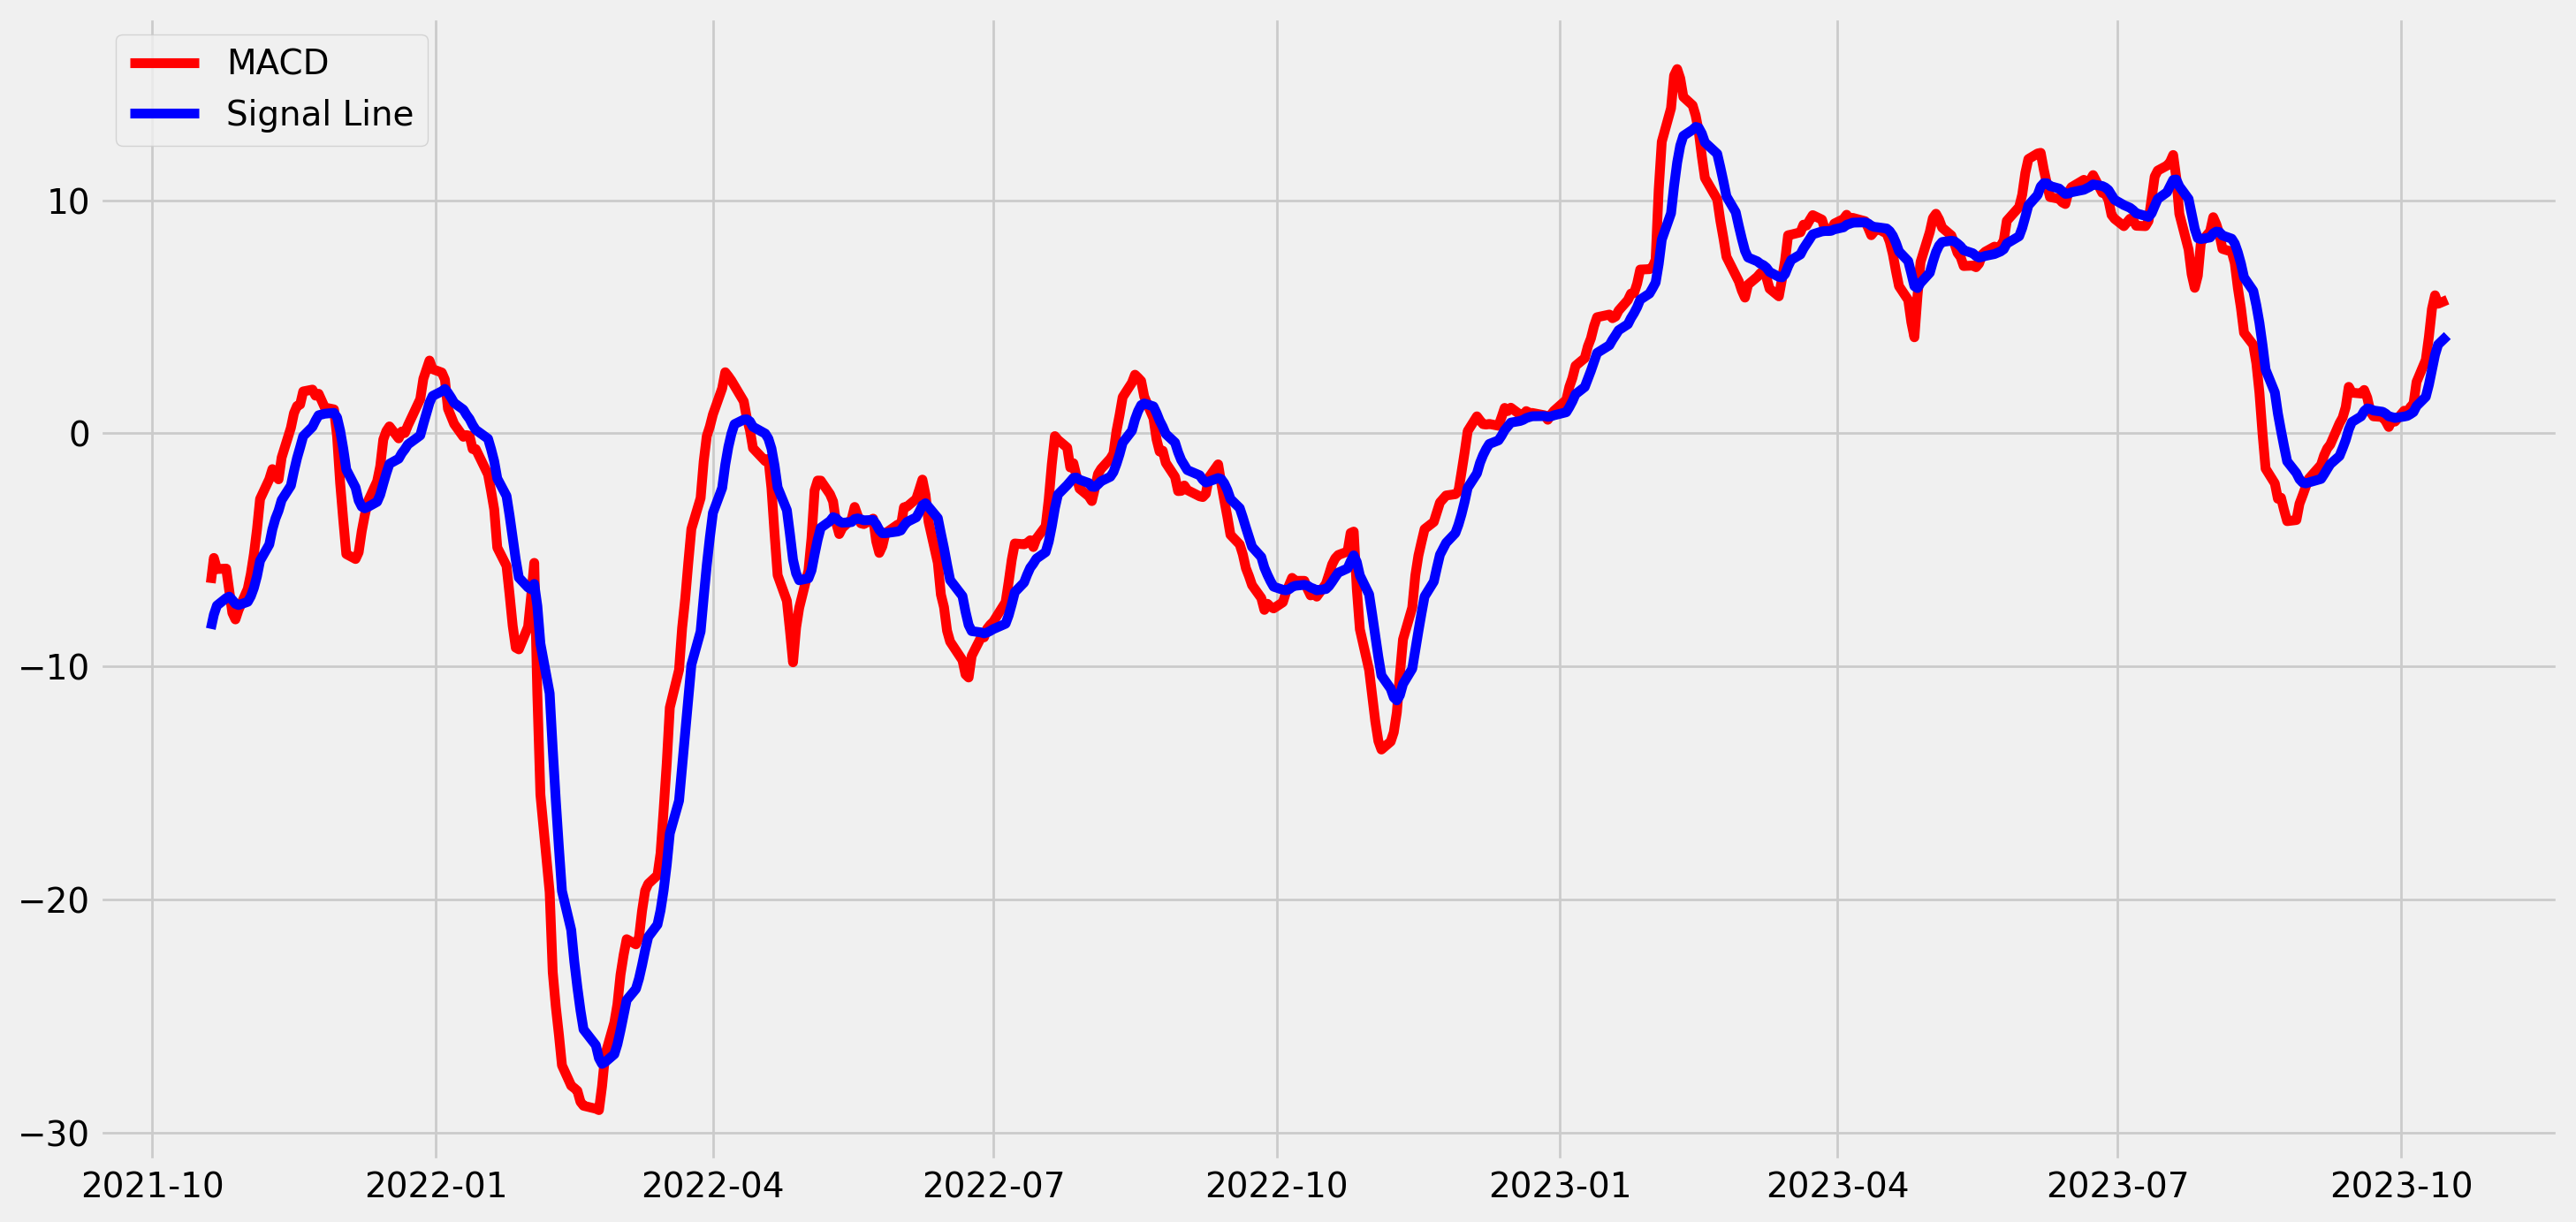

In [236]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8), dpi=200)
plt.plot(df.index[-period:], MACD[-period:], label="MACD", color='red')
plt.plot(df.index[-period:], signal[-period:], label='Signal Line', color='blue')
plt.legend(loc='upper left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig("{}_Signal_Line.jpg".format(security))
plt.show()

In [237]:
df['MACD'] = MACD
df['Signal Line'] = signal
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2023-10-10,319.119995,324.660004,318.160004,321.839996,321.839996,19038000,4.128671,2.074448
2023-10-11,323.010010,328.839996,322.950012,327.820007,327.820007,22036300,5.328897,2.725338
2023-10-12,328.000000,330.540009,322.690002,324.160004,324.160004,20530500,5.916551,3.363580
2023-10-13,323.529999,325.049988,312.369995,314.690002,314.690002,21341000,5.554096,3.801683
2023-10-16,318.640015,321.820007,315.519989,321.149994,321.149994,16536100,5.722155,4.185778


In [238]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                # 买入信号
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                # 卖出信号
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
            
    return (Buy, Sell)
                

In [239]:
df['Buy_Signal_Price'], df['Sell_Signal_Price'] = buy_sell(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000,0.000000,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.335043,-0.067009,NaN,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.835432,-0.220693,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-1.138182,-0.404191,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.280243,-0.579401,NaN,NaN


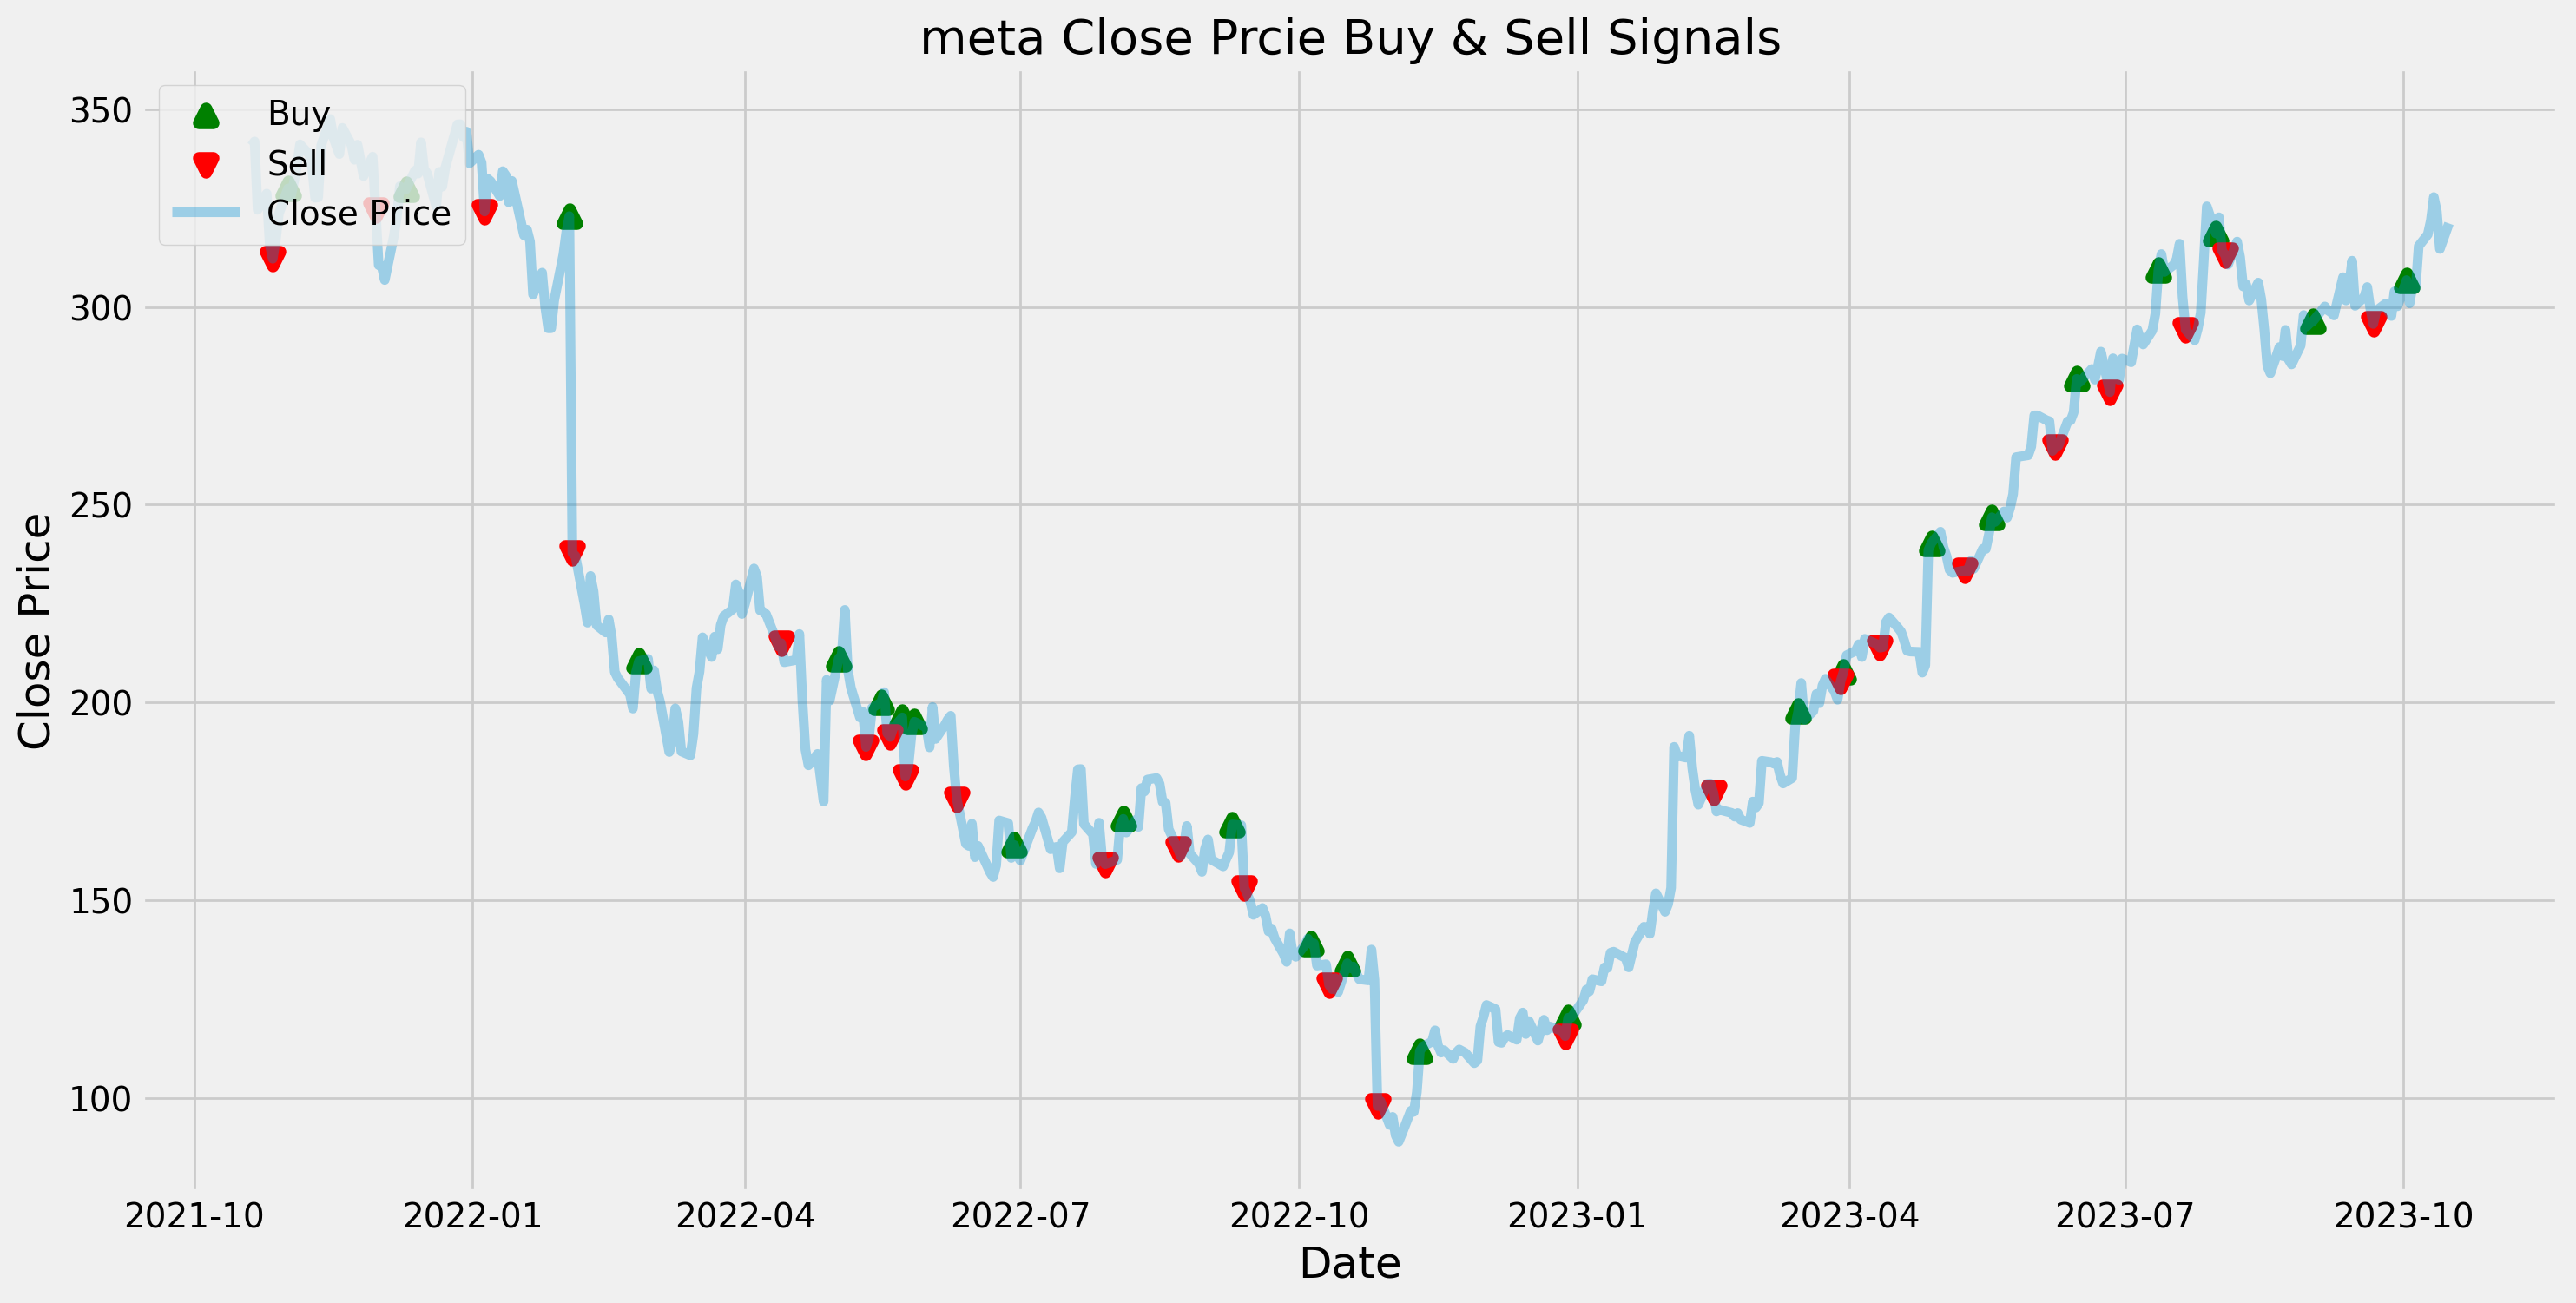

In [240]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8), dpi=200)
plt.scatter(df.index[-period:], df['Buy_Signal_Price'][-period:], label="Buy", color='green', marker='^',alpha=1, linewidths=5)
plt.scatter(df.index[-period:], df['Sell_Signal_Price'][-period:], label="Sell", color='red', marker='v',alpha=1, linewidths=5)
plt.plot(df['Close'][-period:], label='Close Price', alpha=0.35)
plt.title('{} Close Prcie Buy & Sell Signals'.format(security))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig("{}_Buy_Sell_signal.jpg".format(security))
plt.show()

In [241]:
df['Prediction'] = df[['Close']].shift(-his_period)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,Prediction
Date,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000,0.000000,NaN,NaN,30.770000
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.335043,-0.067009,NaN,34.029999,31.200001
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.835432,-0.220693,NaN,NaN,31.469999
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-1.138182,-0.404191,NaN,NaN,31.730000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.280243,-0.579401,NaN,NaN,32.169998


In [242]:
# 为了避免训练数据泄露，对signal数据进行onehot处理
df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())] = 1
df['Buy_Signal_Price'] = df['Buy_Signal_Price'].fillna(0)

df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())] = 1
df['Sell_Signal_Price'] = df['Sell_Signal_Price'].fillna(0)

C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_25536\2732453143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())] = 1
C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_25536\2732453143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())] = 1


In [243]:
# 训练集
X = np.array(df.drop(labels='Prediction',axis=1)[:-his_period])
print(X)

[[ 4.20499992e+01  4.50000000e+01  3.80000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.65299988e+01  3.66599998e+01  3.30000000e+01 ... -6.70085592e-02
   0.00000000e+00  1.00000000e+00]
 [ 3.26100006e+01  3.35900002e+01  3.09400005e+01 ... -2.20693220e-01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.97170013e+02  2.98290009e+02  2.93429993e+02 ... -2.11519245e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.95799988e+02  3.01100006e+02  2.95660004e+02 ... -2.15405081e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.99369995e+02  3.01739990e+02  2.94470001e+02 ... -2.11439284e+00
   1.00000000e+00  0.00000000e+00]]


In [244]:
# 目标值
y = np.array(df['Prediction'][:-his_period])
y

array([ 30.77000046,  31.20000076,  31.46999931, ..., 324.16000366,
       314.69000244, 321.1499939 ])

In [245]:
x_train = X[:-his_period]
x_test = X[-his_period:]
y_train = y[:-his_period]
y_test = y[-his_period:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2811, 10) (30, 10) (2811,) (30,)


In [246]:
tree = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)

In [247]:
prediction = tree.predict(x_test)
print("The model training score is" , tree.score(X, y))

The model training score is 0.9985525388863299


C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_25536\1753908352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


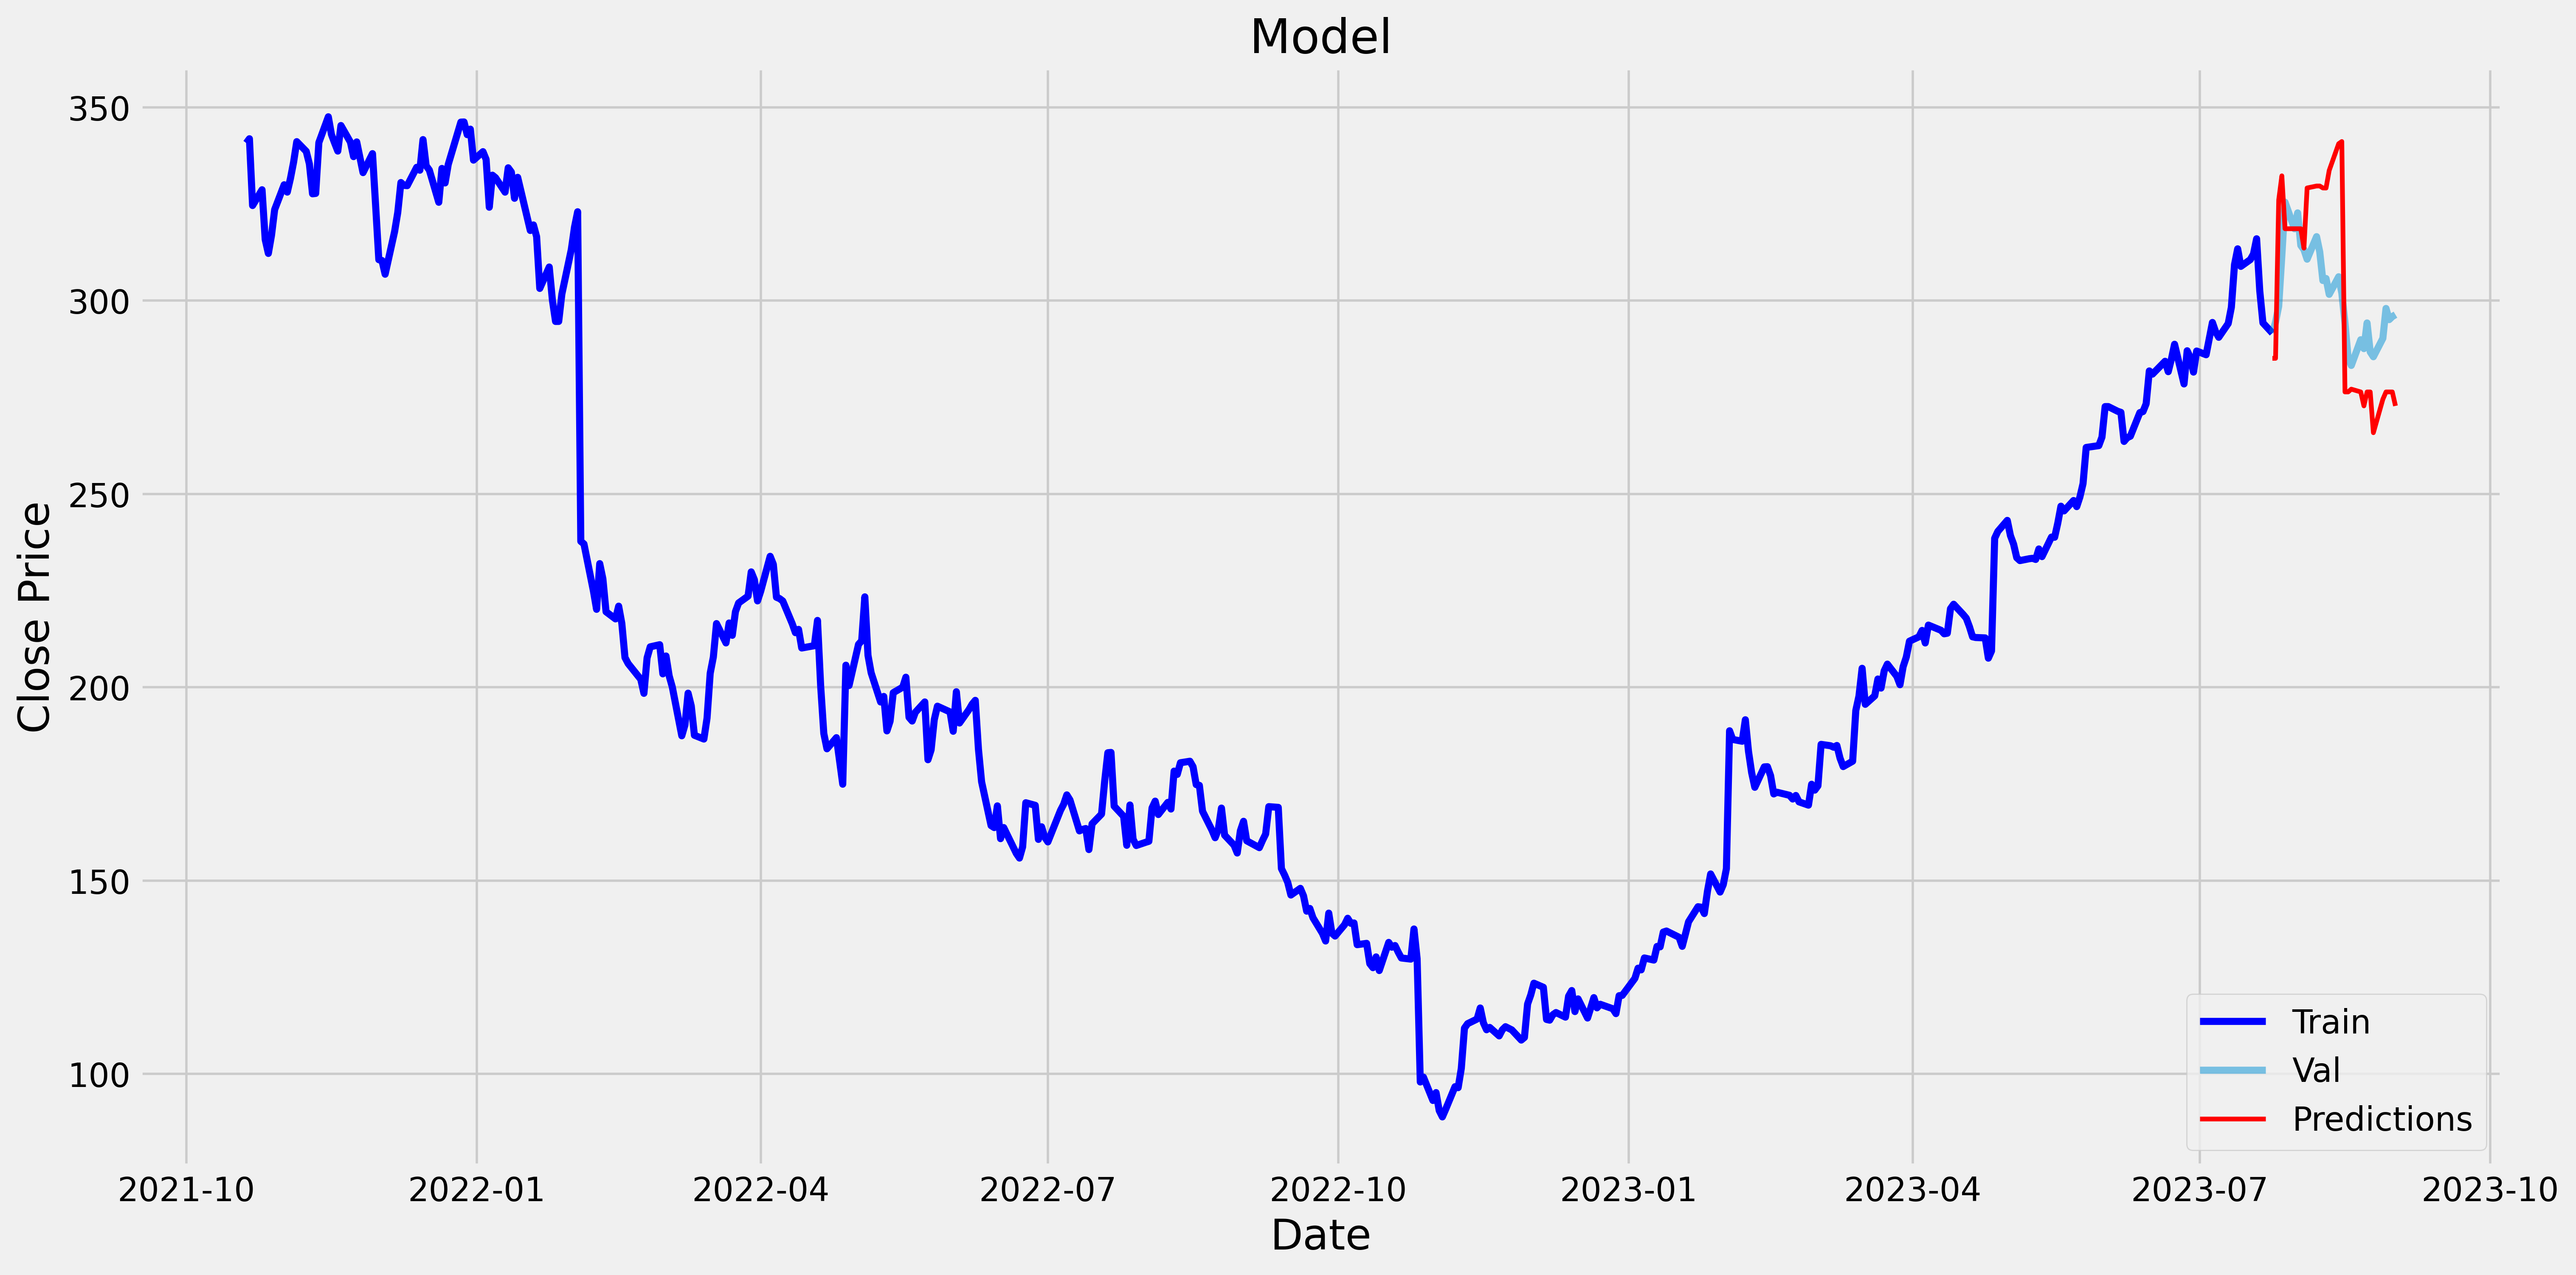

<Figure size 640x480 with 0 Axes>

In [248]:
period = 500  # 可视化范围
valid = df[X.shape[0]-his_period:-his_period]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8), dpi=400)
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df[-period:X.shape[0]-his_period+1]['Close'], linewidth=3, color='blue')
plt.plot(valid['Close'], linewidth=3, alpha=0.5)
plt.plot(valid['Prediction'], linewidth=2, color='red')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
plt.show()
plt.savefig("MACD.jpg")

In [249]:
x_future = np.array(df.drop(labels=['Prediction'], axis=1)[-his_period:])
prediction = tree.predict(x_future)

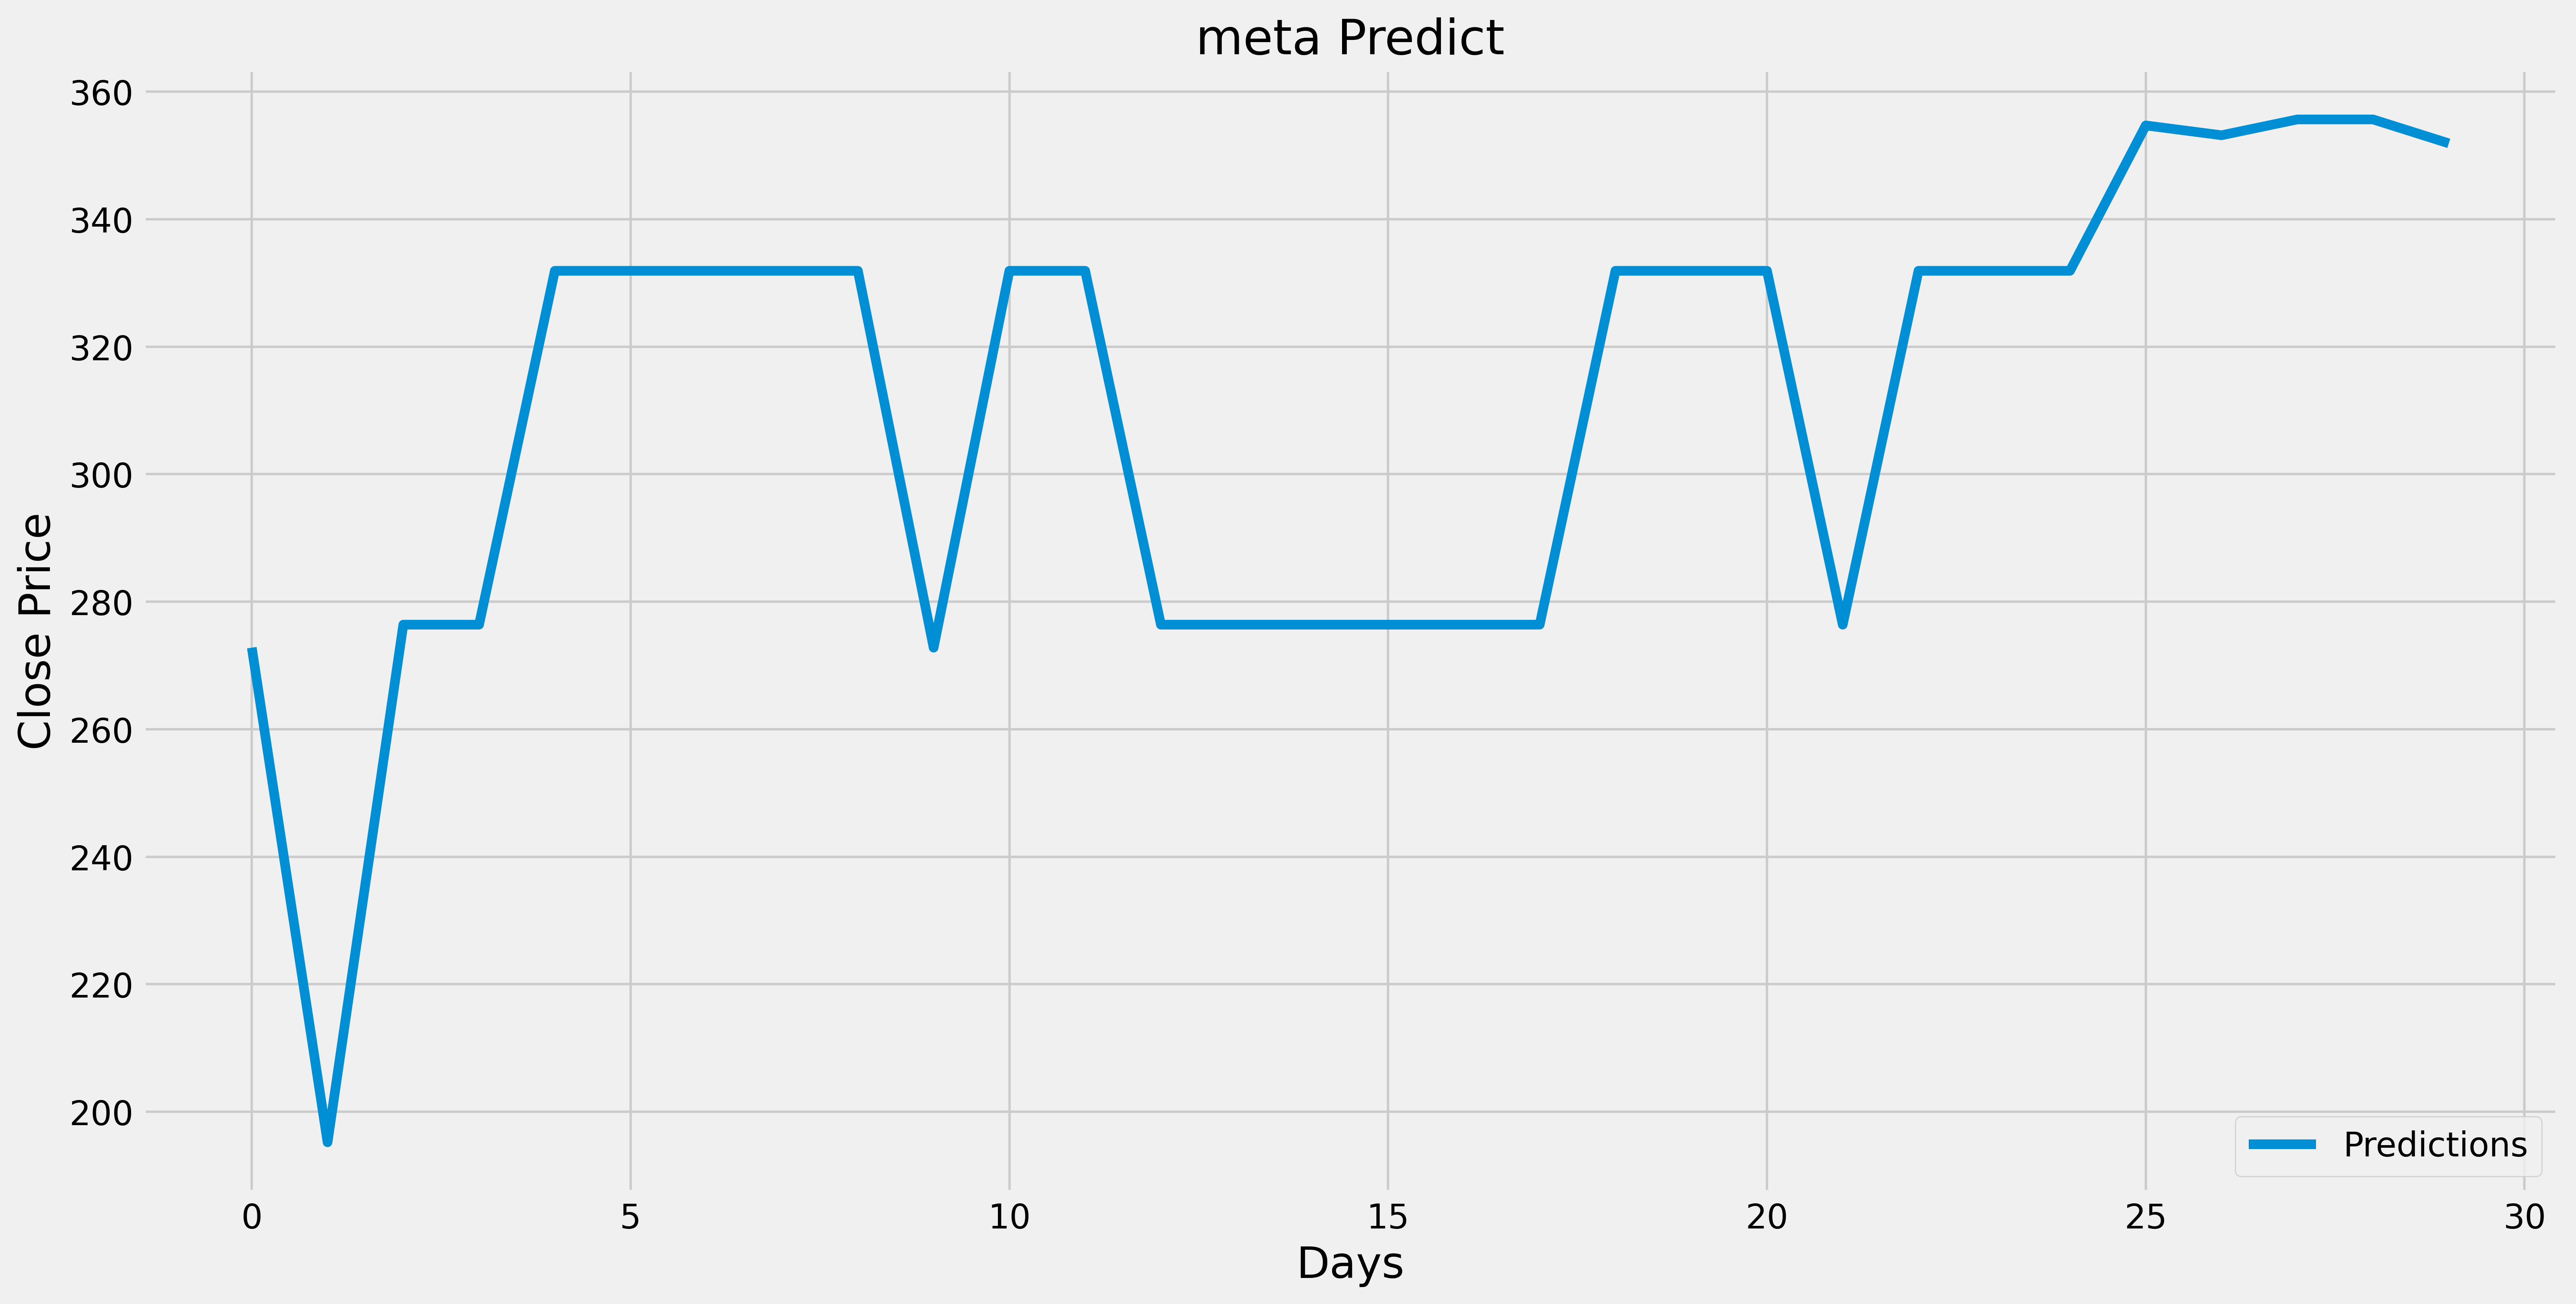

<Figure size 640x480 with 0 Axes>

In [250]:
plt.figure(figsize=(16,8), dpi=400)
plt.title('{} Predict'.format(security))
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(prediction)
plt.legend(['Predictions'], loc='lower right')
# plt.legend(['Predictions'], loc='lower left')
plt.show()
plt.savefig("MACD_predict.jpg")

In [251]:
prediction

array([272.79000854, 195.21000671, 276.3999939 , 276.3999939 ,
       331.8999939 , 331.8999939 , 331.8999939 , 331.8999939 ,
       331.8999939 , 272.79000854, 331.8999939 , 331.8999939 ,
       276.3999939 , 276.3999939 , 276.3999939 , 276.3999939 ,
       276.3999939 , 276.3999939 , 331.8999939 , 331.8999939 ,
       331.8999939 , 276.3999939 , 331.8999939 , 331.8999939 ,
       331.8999939 , 354.70001221, 353.16000366, 355.64001465,
       355.64001465, 351.89001465])

In [252]:
tree.feature_importances_

array([1.44625441e-02, 9.25363281e-02, 2.18346755e-01, 6.28038734e-01,
       2.95039125e-03, 2.42445423e-03, 1.36638979e-02, 2.73290211e-02,
       1.16871253e-05, 2.36187394e-04])